# Challenge Set 5

Topic: Classification  
Settings: Where applicable, use test_size=.30, random_state=4444. This will permit comparison of results across users.  
Data:  
Challenges 1-10: congressional votes Congressional Voting Records Dataset  
Challenge 11: movie data  
Challenge 12: breast cancer surgery Haberman Survival Dataset  
Data – Congressional Votes  
Download the congressional votes data from here:Congressional Voting Records Dataset. These are votes of U.S. House of Representatives Congressmen on 16 key issues in 1984. Read the description of the fields and download the data: house-votes-84.data We will try to see if we can predict the house members' party based on their votes. We will also use some of the general machine learning tools we learned (a bit more efficiently this time).  

## Table of Contents

<a href='#q1'>Q1</a>  
<a href='#q2'>Q2</a>  
<a href='#q3'>Q3</a>  
<a href='#q4'>Q4</a>  
<a href='#q5'>Q5</a>  
<a href='#q6'>Q6</a>  
<a href='#q7'>Q7</a>  
<a href='#q8'>Q8</a>  
<a href='#q9'>Q9</a>  
<a href='#q10'>Q10</a>  
<a href='#q11'>Q11</a>  
<a href='#q12'>Q12</a>  

## Imports

In [328]:
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

%matplotlib inline

<a id='q1'></a>
## Challenge 1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.
Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [329]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
    
df = pd.read_csv('house-votes-84.data', names = ['class', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 
                                                 'r11', 'r12', 'r13', 'r14', 'r15', 'r16'])
df = df.replace('y', int(1))
df = df.replace('n', int(0))

for i in df:
    if i !='class':
        p1 = int(math.floor(df[i][df[i] != '?'].mean()*100))
        p0 = 100-p1
        df[i] = df[i].replace('?', random.choice([1]*p1 + [0]*p0))

df_x = df.drop('class', axis=1)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18171  100 18171    0     0  26458      0 --:--:-- --:--:-- --:--:-- 26449


<a id='q2'></a>
## Challenge 2

Split the data into a test and training set. Use this function: from sklearn.cross_validation import train_test_split

In [330]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df['class'], test_size=.3, random_state=4444)

<a id='q3'></a>
## Challenge 3  
Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):
from sklearn.neighbors import KNeighborsClassifier Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k
You can use this to calculate accuracy:
from sklearn.metrics import accuracy_score Which k value gives the highest accuracy?

In [331]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scores = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i, p=2, metric='minkowski')
    knn.fit(X_train, y_train)
    score = accuracy_score(y_test, knn.predict(X_test))
    scores.append([score, i])
    
max(scores)

[0.93129770992366412, 8]

<a id='q4'></a>
## Challenge 4

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [332]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
log_score = accuracy_score(y_test, lr.predict(X_test))

<a id='q5'></a>
## Challenge 5

Make a bar graph of democrats and republicans. How many of each are there?
Make a very simple predictor that predicts 'democrat' for every incoming example.
Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.
Do the same with predicting 'republican' all the time and measure its accuracy.

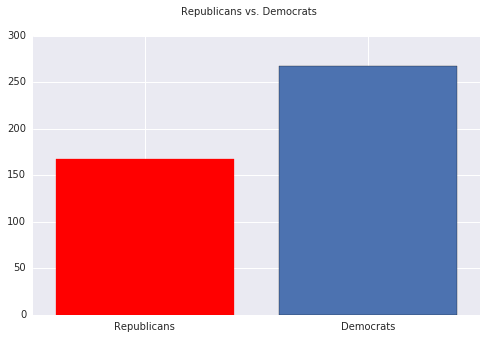

In [336]:
fig, ax = plt.subplots(figsize=(8, 5))

labels= ['Republicans', 'Democrats']
barlist = plt.bar([1, 2], [len(df[df['class']=='republican']), 
                           len(df[df['class']=='democrat'])], align='center')
barlist[0].set_color('r')
plt.xticks([1, 2], labels)

plt.suptitle('Republicans vs. Democrats')
plt.show()

In [337]:
def predictor_d(x):
    rtn = []
    rtn = ['democrat']*len(x)
    return rtn

    
def predictor_r(x):
    rtn = []
    rtn = ['republican']*len(x)
    return rtn

d_only = accuracy_score(y_test, predictor_d(X_test))
r_only = accuracy_score(y_test, predictor_r(X_test))

<a id='q7'></a>
## Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

In [338]:
y = []
for i in range(0,20):
    y.append(scores[i][0])

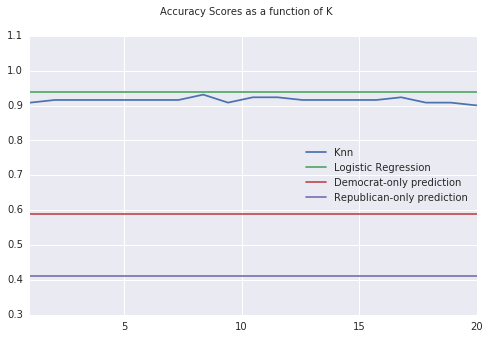

In [339]:
log = [log_score]*20
d = [d_only]*20
r = [r_only]*20

fig, ax = plt.subplots(figsize=(8, 5))

x = np.linspace(1, 21, 20)
#range(1, 21)

plt.plot(x, y, label='Knn')
plt.plot(x, log, label='Logistic Regression')
plt.plot(x, d, label='Democrat-only prediction')
plt.plot(x, r, label='Republican-only prediction')

ax.set_xbound(lower=1, upper=20)
ax.set_ybound(lower=.3, upper=1.1)

plt.suptitle('Accuracy Scores as a function of K')
plt.legend(loc='best')
plt.show()
    

<a id='q7'></a>
## Challenge 7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:
from sklearn.learning_curve import learning_curve  
This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

train_cv_err = np.mean(train_err, axis=1)  
test_cv_err = np.mean(ts_err, axis=1)  
Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [340]:
from sklearn.learning_curve import learning_curve

estimator = lr
train_sizes_abs, train_scores, test_scores = learning_curve(estimator, df_x, df['class'], train_sizes=np.linspace(0.1, 1.0, 10),
                   cv=None, scoring=None, exploit_incremental_learning=False, n_jobs=1, pre_dispatch="all", verbose=0)

train_cv_err_lr = np.mean(train_scores, axis=1)
test_cv_err_lr = np.mean(test_scores, axis=1)

In [341]:
estimator = KNeighborsClassifier(n_neighbors = 13, p=2, metric='minkowski')
train_sizes_abs, train_scores, test_scores = learning_curve(estimator, df_x, df['class'], train_sizes=np.linspace(0.1, 1.0, 10),
                   cv=None, scoring=None, exploit_incremental_learning=False, n_jobs=1, pre_dispatch="all", verbose=0)

train_cv_err_knn = np.mean(train_scores, axis=1)
test_cv_err_knn = np.mean(test_scores, axis=1)

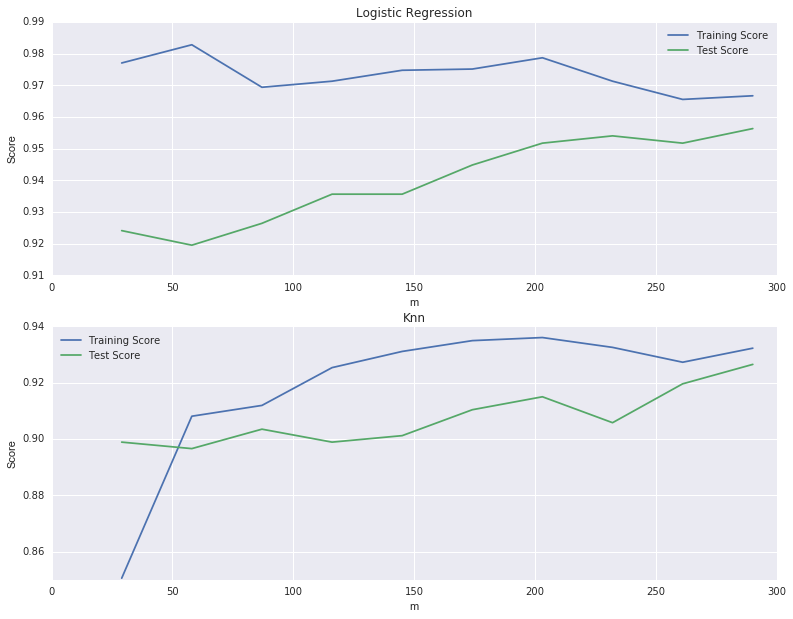

In [347]:
fig, ax = plt.subplots(figsize=(13, 10))

plt.subplot(211)
plt.plot(train_sizes_abs, train_cv_err_lr, label="Training Score")
plt.plot(train_sizes_abs, test_cv_err_lr, label="Test Score")
plt.title("Logistic Regression")
plt.ylabel("Score")
plt.xlabel("m")
plt.legend(loc='best')

plt.subplot(212)
plt.plot(train_sizes_abs, train_cv_err_knn, label="Training Score")
plt.plot(train_sizes_abs, test_cv_err_knn, label="Test Score")
plt.title("Knn")
plt.ylabel("Score")
plt.xlabel("m")
plt.legend(loc='best')

plt.show()

<a id='q8'></a>
## Challenge 8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes: from sklearn.naive_bayes import GaussianNB  
SVM (Support Vector Machine) Classifier: from sklearn.svm import SVC  
Decision Tree: from sklearn.tree import DecisionTreeClassifier  
Random Forest: from sklearn.ensemble import RandomForestClassifier



In [353]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

gauss = GaussianNB()
gauss.fit(X_train, y_train)
print "Naive Bayes: %f" %accuracy_score(y_test, gauss.predict(X_test))

svc = SVC()
svc.fit(X_train, y_train)
print "SVM: %f" %accuracy_score(y_test, svc.predict(X_test))

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print "Decision Tree: %f" %accuracy_score(y_test, tree.predict(X_test))

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
print "Random Forest: %f" %accuracy_score(y_test, forest.predict(X_test))

Naive Bayes: 0.931298
SVM: 0.954198
Decision Tree: 0.938931
Random Forest: 0.946565


<a id='q9'></a>
## Challenge 9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

from sklearn.cross_validation import cross_val_score
Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [354]:
from sklearn.cross_validation import cross_val_score

print np.mean(cross_val_score(gauss, df_x, df['class']))
print np.mean(cross_val_score(svc, df_x, df['class']))
print np.mean(cross_val_score(tree, df_x, df['class']))
print np.mean(cross_val_score(forest, df_x, df['class']))

0.928735632184
0.95632183908
0.954022988506
0.96091954023


<a id='q10'></a>
## Challenge 10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [355]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
    
df = pd.read_csv('house-votes-84.data', names = ['class', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 
                                                 'r11', 'r12', 'r13', 'r14', 'r15', 'r16'])
df = df.drop('class', axis=1)

df = df.replace('y', int(1))
df = df.replace('n', int(0))

for i in df:
    df[i][df[i]=='?'] = int(df[i][df[i] != '?'].mode())
    
df = df.apply(pd.to_numeric)

df_x = df.drop('r1', axis=1)
df_y = df.r1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18171  100 18171    0     0  31831      0 --:--:-- --:--:-- --:--:-- 31823


In [356]:
clf = LogisticRegression()
np.mean(cross_val_score(clf, df_x, df_y))

0.67561451389982319

<a id='q11'></a>
## Challenge 11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?


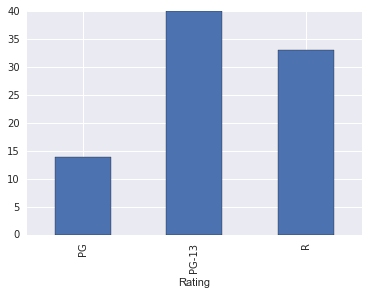

In [357]:
df = pd.read_csv('2013_movies.csv')
df = df.dropna()

df.groupby('Rating')['Title'].count().plot(kind='bar')
plt.show()

In [361]:
X = df[['Budget', 'Runtime', 'DomesticTotalGross']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4444)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = accuracy_score(y_test, knn.predict(X_test))

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_score = accuracy_score(y_test, lr.predict(X_test))

def stupid_predictor(x):
    return ['PG-13']*len(x)

stpd_score = accuracy_score(y_test, stupid_predictor(X_test))

print knn_score
print lr_score
print stpd_score

0.555555555556
0.444444444444
0.407407407407


In [362]:
lr.coef_

array([[ -1.46124379e-08,  -1.75965536e-13,  -1.93897623e-09],
       [  1.49848414e-08,  -9.13751595e-14,  -6.42667083e-09],
       [ -2.30763200e-08,   1.16458130e-13,   5.12598612e-09]])

<a id='q12'></a>
## Challenge 12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset

What is the average and standard deviation of the age of all of the patients?  
What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?  
What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?  
Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.  
What is the earliest year of surgery in this dataset?  
What is the most recent year of surgery?  
Use logistic regression to predict survival after 5 years. How well does your model do?
What are the coefficients of logistic regression? Which features affect the outcome how?
Draw the learning curve for logistic regression in this case.

In [363]:
df = pd.read_csv('haberman.data', names=['age', 'yr_operation', 'ax_nodes', 'survival'])

# All patients
print df.age.mean()
print df.age.std()

#Patients who survived 5+ years after surgery
print df[df.survival==1].age.mean()
print df[df.survival==1].age.std()

#Patients who died within 5 years of surgery
print df[df.survival==2].age.mean()
print df[df.survival==2].age.std()

#Earliest year of surgery
print '19%d'%df.yr_operation.min()

#Most recent year of surgery
print '19%d'%df.yr_operation.max()

52.4575163399
10.8034523493
52.0177777778
11.0121541799
53.6790123457
10.1671372083
1958
1969


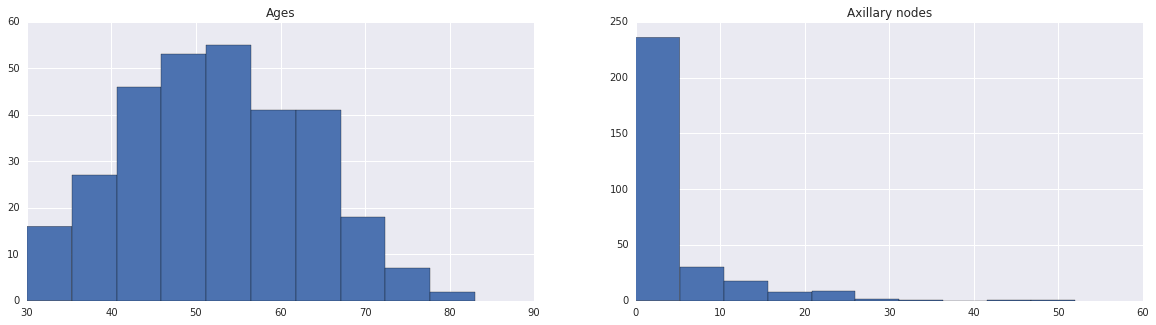

In [380]:
plt.figure(figsize=(20, 5))

plt.subplot(121)
df.age.hist()
plt.title("Ages")

plt.subplot(122)
df.ax_nodes.hist()
plt.title("Axillary nodes")

plt.show()

In [369]:
lr = LogisticRegression()
X = df.drop('survival', axis=1)
y = df.survival

train_sizes_abs, train_scores, test_scores = learning_curve(lr, X, y, train_sizes=np.linspace(0.1, 1.0, 10),
                   cv=None, scoring=None)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

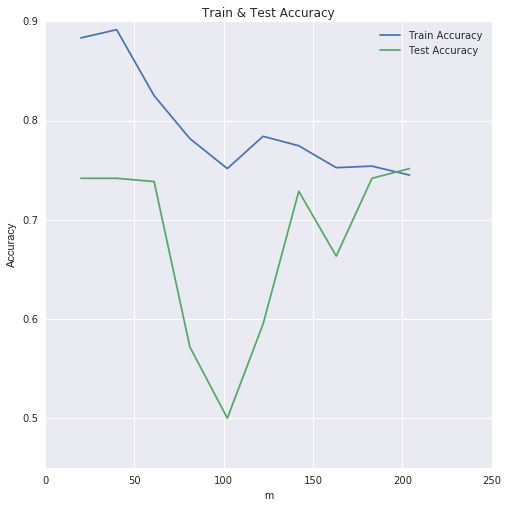

In [370]:
plt.figure(figsize=(8, 8))
plt.plot(train_sizes_abs, train_mean, label = 'Train Accuracy')
plt.plot(train_sizes_abs, test_mean, label='Test Accuracy')
plt.legend(loc='best')
plt.title('Train & Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('m')
plt.show()

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4444)
lr.fit(X_train, y_train)
lr.coef_

array([[ 0.0155515 , -0.02899279,  0.07136197]])